In [7]:
# ============================================================================
# STEP 1: INSTALL REQUIRED LIBRARIES
# ============================================================================
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost -q

print("✅ Step 1: Libraries installed successfully!")

✅ Step 1: Libraries installed successfully!


In [8]:
# ============================================================================
# STEP 2: IMPORT ALL LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For handling imbalanced data
from imblearn.over_sampling import SMOTE

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Step 2: All libraries imported successfully!")

✅ Step 2: All libraries imported successfully!


In [9]:
# ============================================================================
# STEP 3: LOAD YOUR DATASET
# ============================================================================
# If you uploaded the dataset file to Google Colab
from google.colab import files
import io

# Upload your dataset file
print("📁 Please upload your fraud detection dataset file (CSV format)")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"📂 Uploaded file: {filename}")

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ Dataset loaded successfully!")

# Display basic info
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

📁 Please upload your fraud detection dataset file (CSV format)


Saving creditcard.csv to creditcard.csv
📂 Uploaded file: creditcard.csv
✅ Dataset loaded successfully!

📊 Dataset Shape: (284807, 31)
📋 Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  

In [10]:
# ============================================================================
# STEP 4: INITIAL DATA EXPLORATION
# ============================================================================
print("="*80)
print("STEP 4: DATA EXPLORATION")
print("="*80)

# 4.1 Basic information
print("📈 DATASET INFORMATION:")
print(df.info())

print("\n📊 DESCRIPTIVE STATISTICS:")
print(df.describe())

# 4.2 Check for missing values
print("\n🔍 CHECKING FOR MISSING VALUES:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing values summary:")
print(missing_df[missing_df['Missing Values'] > 0])

if missing_df['Missing Values'].sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing Values'].sum()}")
    # Fill missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    print("✅ Missing values filled!")

# 4.3 Check class distribution (fraud column)
# Look for common fraud column names
fraud_columns = ['Class', 'Fraud', 'isFraud', 'is_fraud', 'fraud', 'target']
fraud_col = None

for col in fraud_columns:
    if col in df.columns:
        fraud_col = col
        break

if fraud_col:
    print(f"\n🎯 FRAUD COLUMN FOUND: '{fraud_col}'")
    print("\nClass Distribution:")
    class_counts = df[fraud_col].value_counts()
    class_percentages = df[fraud_col].value_counts(normalize=True) * 100

    for label, count in class_counts.items():
        percentage = class_percentages[label]
        status = "FRAUD" if label == 1 else "LEGITIMATE"
        print(f"  {status} ({label}): {count:,} transactions ({percentage:.2f}%)")

    print(f"\n⚖️ Imbalance Ratio: {class_counts[0]/class_counts[1]:.1f}:1")
else:
    print("⚠️ No standard fraud column found. Please check your dataset.")
    print("Available columns:", list(df.columns))
    # Use the last column as target if not found
    fraud_col = df.columns[-1]
    print(f"Using '{fraud_col}' as target variable")

STEP 4: DATA EXPLORATION
📈 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  


STEP 5: DATA VISUALIZATION


<Figure size 1000x500 with 0 Axes>

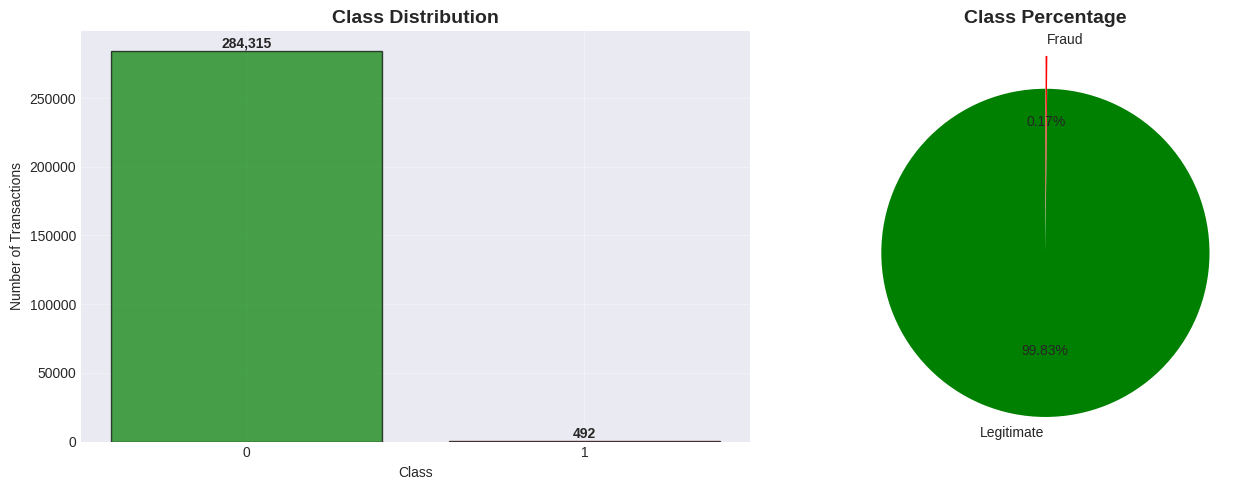


💰 AMOUNT COLUMN FOUND: 'Amount'

📊 Amount Statistics by Class:
Legitimate Transactions:
  Mean: $88.29
  Median: $22.00
  Std: $250.11

Fraud Transactions:
  Mean: $122.21
  Median: $9.25
  Std: $256.68


<Figure size 1200x1000 with 0 Axes>

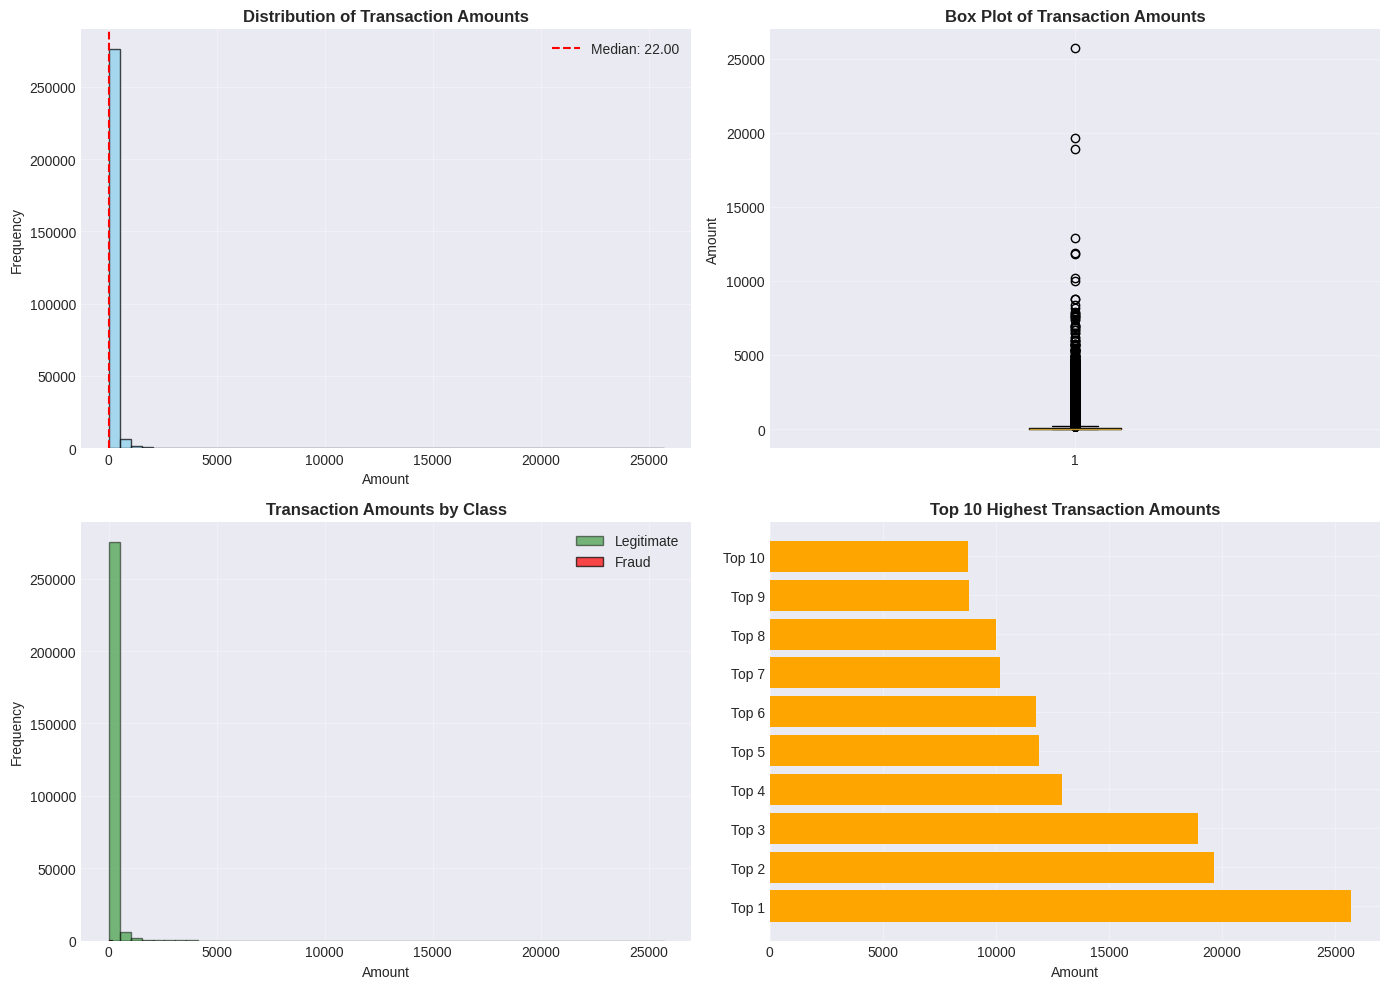

In [11]:
# ============================================================================
# STEP 5: VISUALIZE DATA DISTRIBUTION
# ============================================================================
print("\n" + "="*80)
print("STEP 5: DATA VISUALIZATION")
print("="*80)

# 5.1 Class Distribution Visualization
if fraud_col:
    plt.figure(figsize=(10, 5))

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Bar plot
    class_counts = df[fraud_col].value_counts()
    colors = ['green', 'red'] if len(class_counts) == 2 else ['green', 'red', 'blue']

    bars = ax1.bar(class_counts.index.astype(str), class_counts.values,
                   color=colors[:len(class_counts)], alpha=0.7, edgecolor='black')
    ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Number of Transactions')
    ax1.grid(True, alpha=0.3)

    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

    # Pie chart
    if len(class_counts) <= 3:
        labels = ['Legitimate', 'Fraud'][:len(class_counts)]
        ax2.pie(class_counts.values, labels=labels, autopct='%1.2f%%',
                colors=colors[:len(class_counts)], startangle=90, explode=[0.1]*len(class_counts))
        ax2.set_title('Class Percentage', fontsize=14, fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'Too many classes\nfor pie chart',
                ha='center', va='center', fontsize=12)
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

# 5.2 Check for amount column
amount_columns = ['Amount', 'amount', 'transaction_amount', 'amt']
amount_col = None

for col in amount_columns:
    if col in df.columns:
        amount_col = col
        break

if amount_col:
    print(f"\n💰 AMOUNT COLUMN FOUND: '{amount_col}'")

    plt.figure(figsize=(12, 10))

    # Create subplots for amount analysis
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram of all amounts
    axes[0, 0].hist(df[amount_col], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribution of Transaction Amounts', fontweight='bold')
    axes[0, 0].set_xlabel('Amount')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axvline(df[amount_col].median(), color='red', linestyle='--',
                       label=f'Median: {df[amount_col].median():.2f}')
    axes[0, 0].legend()

    # Box plot
    axes[0, 1].boxplot(df[amount_col])
    axes[0, 1].set_title('Box Plot of Transaction Amounts', fontweight='bold')
    axes[0, 1].set_ylabel('Amount')
    axes[0, 1].grid(True, alpha=0.3)

    # Fraud vs Legitimate amounts
    if fraud_col:
        fraud_amounts = df[df[fraud_col] == 1][amount_col] if 1 in df[fraud_col].unique() else pd.Series()
        legit_amounts = df[df[fraud_col] == 0][amount_col] if 0 in df[fraud_col].unique() else pd.Series()

        if len(fraud_amounts) > 0 and len(legit_amounts) > 0:
            axes[1, 0].hist(legit_amounts, bins=50, alpha=0.5, label='Legitimate',
                           color='green', edgecolor='black')
            axes[1, 0].hist(fraud_amounts, bins=50, alpha=0.7, label='Fraud',
                           color='red', edgecolor='black')
            axes[1, 0].set_title('Transaction Amounts by Class', fontweight='bold')
            axes[1, 0].set_xlabel('Amount')
            axes[1, 0].set_ylabel('Frequency')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)

            # Statistics
            print(f"\n📊 Amount Statistics by Class:")
            print(f"Legitimate Transactions:")
            print(f"  Mean: ${legit_amounts.mean():.2f}")
            print(f"  Median: ${legit_amounts.median():.2f}")
            print(f"  Std: ${legit_amounts.std():.2f}")
            print(f"\nFraud Transactions:")
            print(f"  Mean: ${fraud_amounts.mean():.2f}")
            print(f"  Median: ${fraud_amounts.median():.2f}")
            print(f"  Std: ${fraud_amounts.std():.2f}")

    # Top 10 highest amounts
    top_amounts = df[amount_col].sort_values(ascending=False).head(10)
    axes[1, 1].barh(range(10), top_amounts.values, color='orange')
    axes[1, 1].set_yticks(range(10))
    axes[1, 1].set_yticklabels([f'Top {i+1}' for i in range(10)])
    axes[1, 1].set_xlabel('Amount')
    axes[1, 1].set_title('Top 10 Highest Transaction Amounts', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No amount column found in the dataset")


STEP 6: CORRELATION ANALYSIS
📊 Top 10 Features Most Correlated with Fraud:
Feature  Correlation
  Class     1.000000
    V11     0.154876
     V4     0.133447
     V2     0.091289
    V21     0.040413
    V19     0.034783
    V20     0.020090
     V8     0.019875
    V27     0.017580
    V28     0.009536
 Amount     0.005632


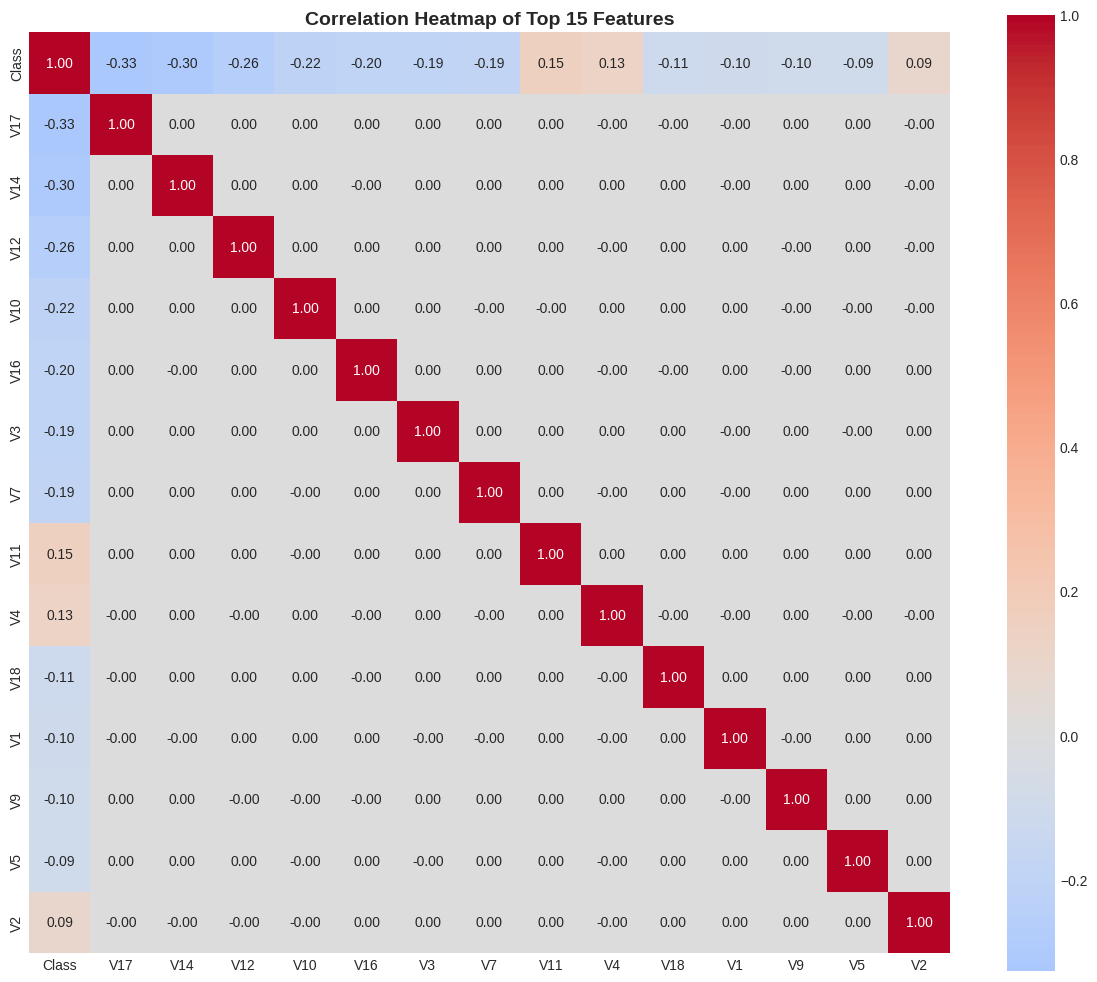

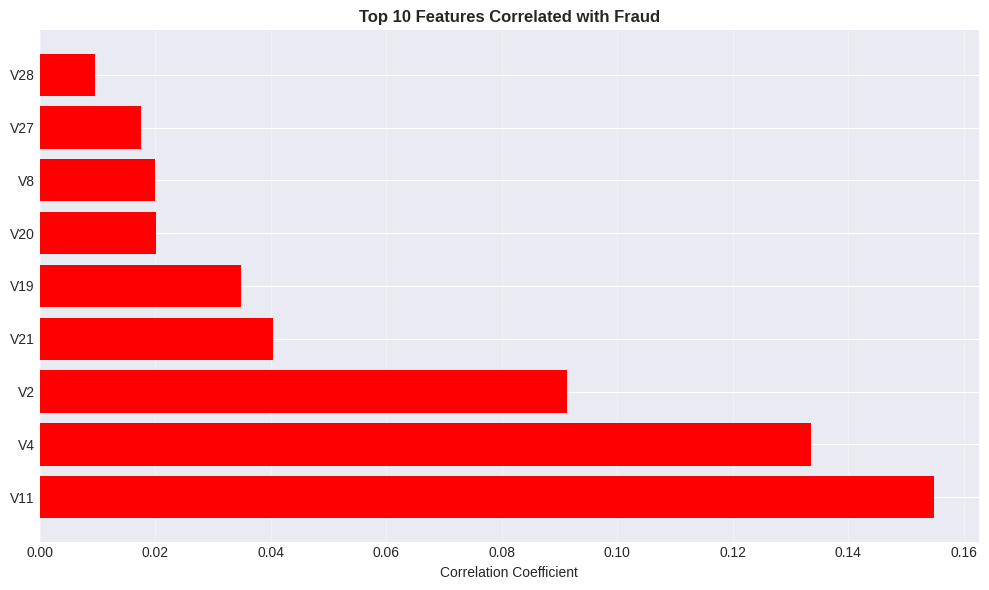

In [12]:
# ============================================================================
# STEP 6: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("STEP 6: CORRELATION ANALYSIS")
print("="*80)

if fraud_col:
    # Calculate correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])

    if len(numeric_df.columns) > 1:
        correlation_matrix = numeric_df.corr()

        # Get correlation with fraud column
        if fraud_col in correlation_matrix.columns:
            fraud_correlation = correlation_matrix[fraud_col].sort_values(ascending=False)

            print("📊 Top 10 Features Most Correlated with Fraud:")
            top_corr = pd.DataFrame({
                'Feature': fraud_correlation.index,
                'Correlation': fraud_correlation.values
            }).head(11)

            print(top_corr.to_string(index=False))

            # Plot correlation heatmap for top 15 features
            top_features = fraud_correlation.abs().sort_values(ascending=False).head(15).index.tolist()

            plt.figure(figsize=(12, 10))
            top_corr_matrix = numeric_df[top_features].corr()

            sns.heatmap(top_corr_matrix,
                        annot=True,
                        fmt='.2f',
                        cmap='coolwarm',
                        center=0,
                        square=True)

            plt.title('Correlation Heatmap of Top 15 Features', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            # Plot feature correlations
            plt.figure(figsize=(10, 6))
            top_10 = fraud_correlation.head(10).iloc[1:]  # Exclude fraud column itself

            colors = ['red' if x > 0 else 'blue' for x in top_10.values]
            plt.barh(range(len(top_10)), top_10.values, color=colors)
            plt.yticks(range(len(top_10)), top_10.index)
            plt.xlabel('Correlation Coefficient')
            plt.title('Top 10 Features Correlated with Fraud', fontweight='bold')
            plt.grid(True, alpha=0.3, axis='x')
            plt.tight_layout()
            plt.show()
else:
    print("⚠️ Cannot perform correlation analysis without fraud column")

In [13]:
# ============================================================================
# STEP 7: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("STEP 7: DATA PREPROCESSING")
print("="*80)

if fraud_col:
    # 7.1 Separate features and target
    X = df.drop(fraud_col, axis=1)
    y = df[fraud_col]

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")

    # 7.2 Handle categorical variables
    categorical_cols = X.select_dtypes(include=['object']).columns

    if len(categorical_cols) > 0:
        print(f"\n🔧 Handling {len(categorical_cols)} categorical columns:")
        for col in categorical_cols:
            print(f"  - {col}: {X[col].nunique()} unique values")

        # One-hot encoding for categorical variables
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
        print(f"✅ One-hot encoding completed. New shape: {X.shape}")

    # 7.3 Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"\n📊 Data Split Results:")
    print(f"Training set: {X_train.shape[0]:,} samples")
    print(f"Testing set:  {X_test.shape[0]:,} samples")
    print(f"Training fraud rate: {y_train.mean()*100:.4f}%")
    print(f"Testing fraud rate:  {y_test.mean()*100:.4f}%")

    # 7.4 Scale the features
    print("\n⚖️ Scaling Features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("✅ Features scaled successfully!")

    # 7.5 Handle class imbalance with SMOTE
    print("\n⚖️ Handling Class Imbalance with SMOTE...")

    print("Before SMOTE:")
    print(f"  Training samples: {len(X_train_scaled):,}")
    print(f"  Class distribution: {dict(y_train.value_counts())}")

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

    print("\nAfter SMOTE:")
    print(f"  Training samples: {len(X_train_balanced):,}")
    print(f"  Class distribution: {dict(pd.Series(y_train_balanced).value_counts())}")
    print(f"  Balanced fraud rate: {y_train_balanced.mean()*100:.2f}%")

    print("\n✅ Step 7: Data preprocessing completed!")
else:
    print("❌ Cannot preprocess data without fraud column!")


STEP 7: DATA PREPROCESSING
Features shape: (284807, 30)
Target shape: (284807,)

📊 Data Split Results:
Training set: 227,845 samples
Testing set:  56,962 samples
Training fraud rate: 0.1729%
Testing fraud rate:  0.1720%

⚖️ Scaling Features...
✅ Features scaled successfully!

⚖️ Handling Class Imbalance with SMOTE...
Before SMOTE:
  Training samples: 227,845
  Class distribution: {0: np.int64(227451), 1: np.int64(394)}

After SMOTE:
  Training samples: 454,902
  Class distribution: {0: np.int64(227451), 1: np.int64(227451)}
  Balanced fraud rate: 50.00%

✅ Step 7: Data preprocessing completed!


In [14]:
# ============================================================================
# STEP 8: TRAIN MACHINE LEARNING MODELS
# ============================================================================
print("\n" + "="*80)
print("STEP 8: TRAINING MACHINE LEARNING MODELS")
print("="*80)

if fraud_col and 'X_train_balanced' in locals():
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    # Dictionary to store results
    results = {}

    print("🚀 Training Models...\n")

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        try:
            # Train model
            model.fit(X_train_balanced, y_train_balanced)

            # Make predictions
            y_pred = model.predict(X_test_scaled)

            # For models that support predict_proba
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
            else:
                y_pred_proba = None
                roc_auc = None

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            # Store results
            results[model_name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc,
                'Model': model,
                'Predictions': y_pred
            }

            print(f"✅ {model_name} trained successfully!")
            print(f"   Accuracy:  {accuracy:.4f}")
            print(f"   Precision: {precision:.4f}")
            print(f"   Recall:    {recall:.4f}")
            print(f"   F1-Score:  {f1:.4f}")
            if roc_auc:
                print(f"   ROC-AUC:   {roc_auc:.4f}")
            print()

        except Exception as e:
            print(f"❌ Error training {model_name}: {str(e)}")

    print("✅ Step 8: Model training completed!")
else:
    print("❌ Cannot train models without preprocessed data!")


STEP 8: TRAINING MACHINE LEARNING MODELS
🚀 Training Models...

Training Logistic Regression...
✅ Logistic Regression trained successfully!
   Accuracy:  0.9741
   Precision: 0.0578
   Recall:    0.9184
   F1-Score:  0.1088
   ROC-AUC:   0.9708

Training Random Forest...
✅ Random Forest trained successfully!
   Accuracy:  0.9995
   Precision: 0.8710
   Recall:    0.8265
   F1-Score:  0.8482
   ROC-AUC:   0.9684

Training Decision Tree...
✅ Decision Tree trained successfully!
   Accuracy:  0.9976
   Precision: 0.3949
   Recall:    0.7857
   F1-Score:  0.5256
   ROC-AUC:   0.8918

Training XGBoost...
✅ XGBoost trained successfully!
   Accuracy:  0.9992
   Precision: 0.7281
   Recall:    0.8469
   F1-Score:  0.7830
   ROC-AUC:   0.9800

✅ Step 8: Model training completed!



STEP 9: MODEL EVALUATION
📊 MODEL PERFORMANCE SUMMARY:
--------------------------------------------------


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.9995,0.8710,0.8265,0.8482,0.9684
XGBoost,0.9992,0.7281,0.8469,0.7830,0.9800
Decision Tree,0.9976,0.3949,0.7857,0.5256,0.8918
Logistic Regression,0.9741,0.0578,0.9184,0.1088,0.9708



🏆 BEST MODEL: Random Forest
   Best F1-Score: 0.8482
   Best Recall: 0.8265


<Figure size 1200x800 with 0 Axes>

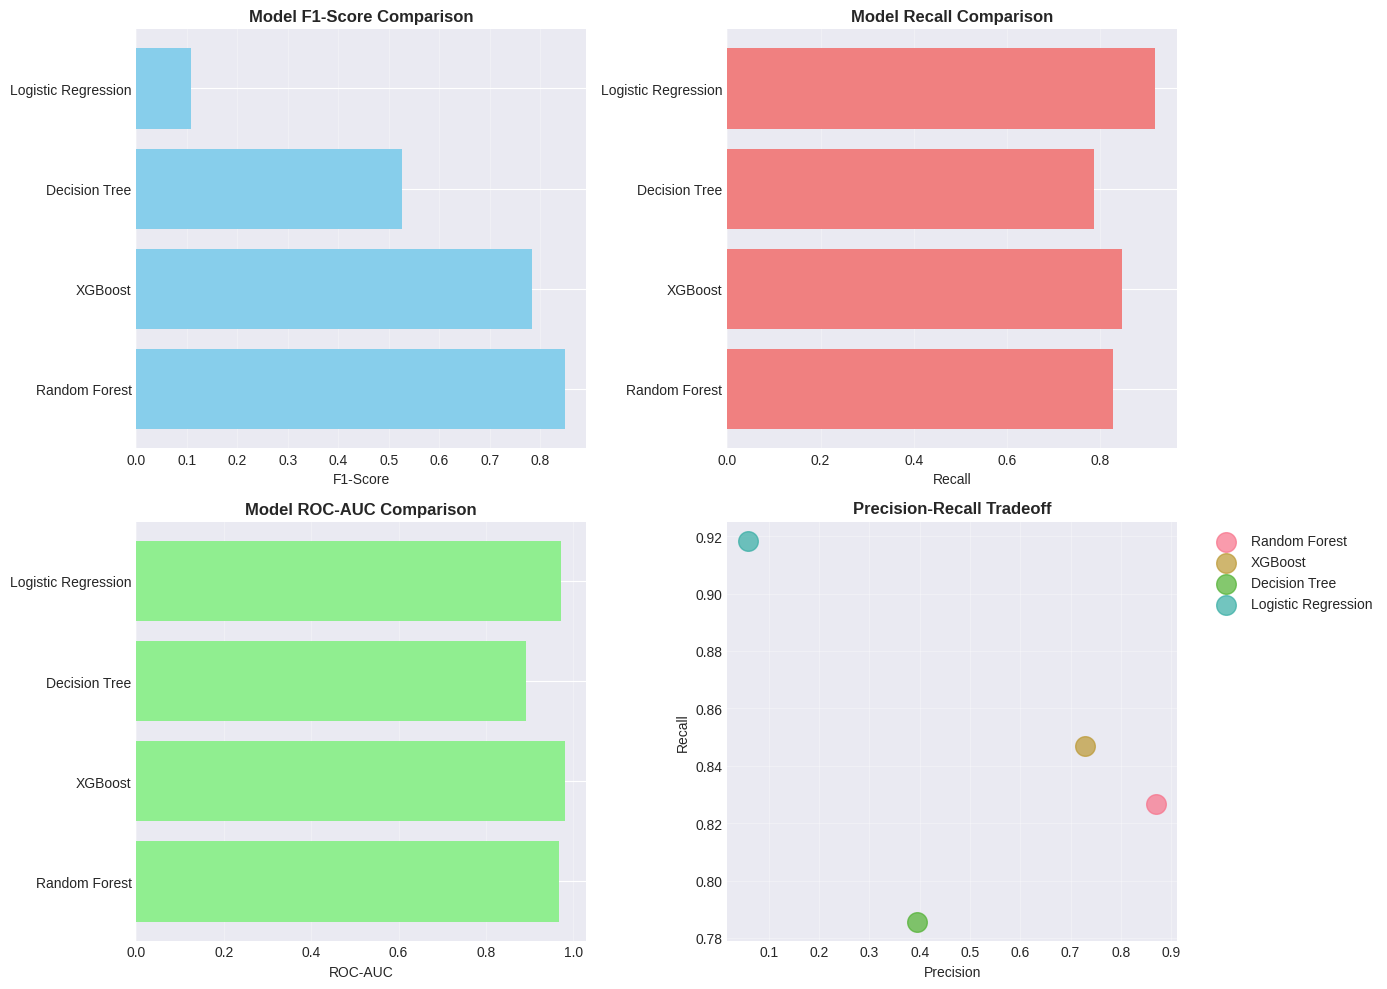

✅ Step 9: Model evaluation completed!


In [15]:
# ============================================================================
# STEP 9: MODEL EVALUATION
# ============================================================================
print("\n" + "="*80)
print("STEP 9: MODEL EVALUATION")
print("="*80)

if 'results' in locals() and len(results) > 0:
    # Create results dataframe
    results_df = pd.DataFrame(results).T.drop(['Model', 'Predictions'], axis=1)
    results_df = results_df.sort_values('F1-Score', ascending=False)

    print("📊 MODEL PERFORMANCE SUMMARY:")
    print("-"*50)

    # Display with formatting
    display(results_df.style.format('{:.4f}').background_gradient(cmap='YlOrRd', subset=['F1-Score', 'Recall']))

    # Identify best model based on F1-Score
    best_model_name = results_df['F1-Score'].idxmax()
    best_model = results[best_model_name]['Model']
    best_predictions = results[best_model_name]['Predictions']

    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
    print(f"   Best Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")

    # Visualization of model comparison
    plt.figure(figsize=(12, 8))

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. F1-Score comparison
    axes[0, 0].barh(results_df.index, results_df['F1-Score'], color='skyblue')
    axes[0, 0].set_xlabel('F1-Score')
    axes[0, 0].set_title('Model F1-Score Comparison', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')

    # 2. Recall comparison
    axes[0, 1].barh(results_df.index, results_df['Recall'], color='lightcoral')
    axes[0, 1].set_xlabel('Recall')
    axes[0, 1].set_title('Model Recall Comparison', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='x')

    # 3. ROC-AUC comparison (if available)
    if results_df['ROC-AUC'].notna().any():
        axes[1, 0].barh(results_df.index, results_df['ROC-AUC'].fillna(0), color='lightgreen')
        axes[1, 0].set_xlabel('ROC-AUC')
        axes[1, 0].set_title('Model ROC-AUC Comparison', fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='x')
    else:
        axes[1, 0].text(0.5, 0.5, 'ROC-AUC not available\nfor all models',
                       ha='center', va='center', fontsize=12)
        axes[1, 0].axis('off')

    # 4. Precision-Recall scatter
    for model_name in results_df.index:
        axes[1, 1].scatter(results_df.loc[model_name, 'Precision'],
                          results_df.loc[model_name, 'Recall'],
                          s=200, alpha=0.7, label=model_name)
    axes[1, 1].set_xlabel('Precision')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].set_title('Precision-Recall Tradeoff', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    print("✅ Step 9: Model evaluation completed!")
else:
    print("❌ No results to evaluate!")


STEP 10: DETAILED ANALYSIS OF Random Forest

🔍 CONFUSION MATRIX:
------------------------------
Confusion Matrix:
                   Predicted Legitimate  Predicted Fraud
Actual Legitimate                 56852               12
Actual Fraud                         17               81

📊 DETAILED METRICS:
True Negatives (TN):  56,852 - Correct legitimate transactions
False Positives (FP): 12 - False alarms (Type I error)
False Negatives (FN): 17 - Missed fraud (Type II error)
True Positives (TP):  81 - Correct fraud detections

📈 DERIVED METRICS:
False Positive Rate: 0.02%
False Negative Rate: 17.35%
True Positive Rate (Recall): 82.65%
True Negative Rate: 99.98%
Positive Predictive Value (Precision): 87.10%


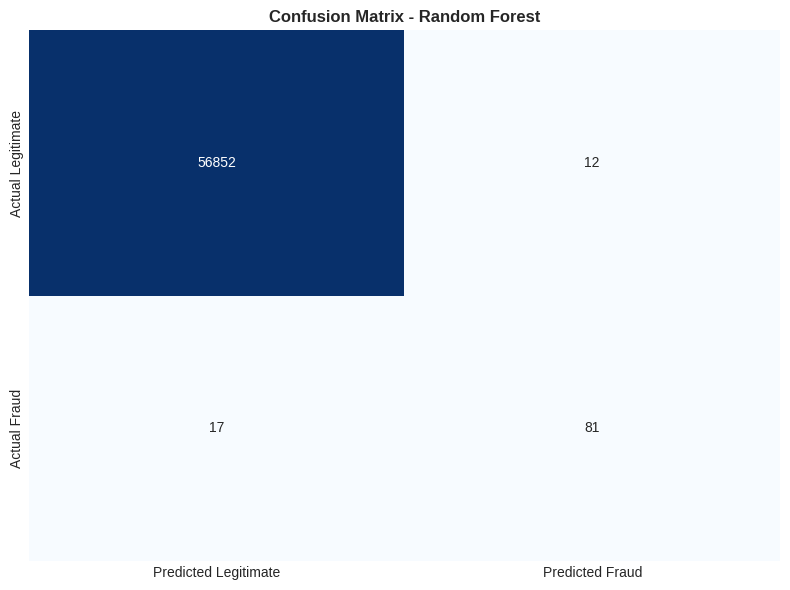


📋 CLASSIFICATION REPORT:
------------------------------
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


📊 FEATURE IMPORTANCE:
------------------------------
Top 10 Most Important Features:


,Feature,Importance
14,V14,0.191127
10,V10,0.111454
4,V4,0.111395
12,V12,0.095690
17,V17,0.082761
3,V3,0.063935
11,V11,0.049290
16,V16,0.045124
2,V2,0.038541
9,V9,0.026552


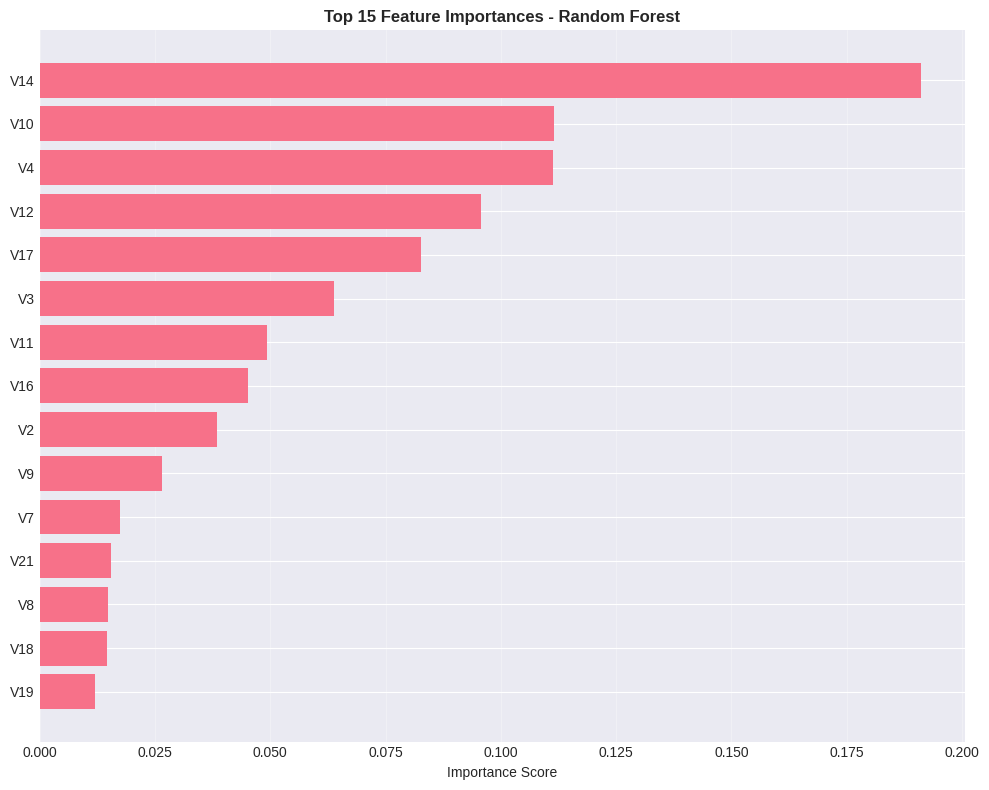


📊 ROC CURVE ANALYSIS:
------------------------------


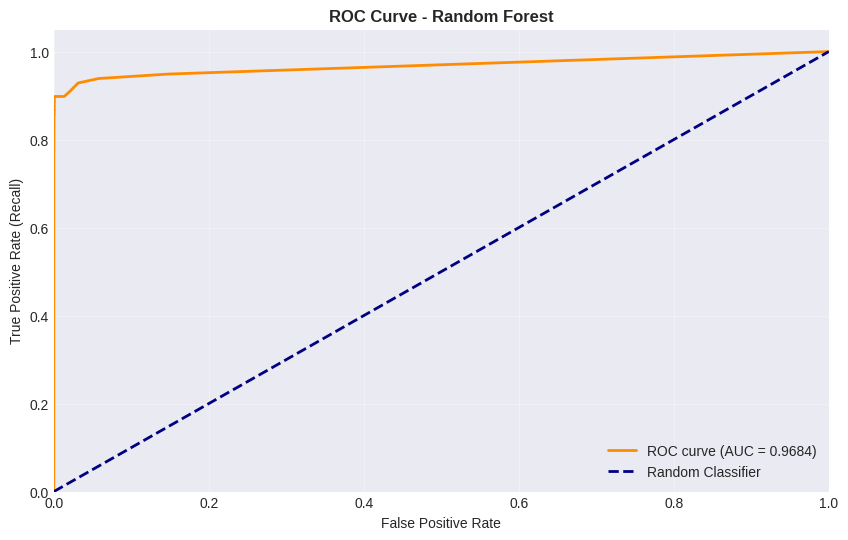

✅ Step 10: Detailed analysis completed!


In [16]:
# ============================================================================
# STEP 10: DETAILED ANALYSIS OF BEST MODEL
# ============================================================================
print("\n" + "="*80)
print(f"STEP 10: DETAILED ANALYSIS OF {best_model_name}")
print("="*80)

if 'best_predictions' in locals():
    # 10.1 Confusion Matrix
    print("\n🔍 CONFUSION MATRIX:")
    print("-"*30)

    cm = confusion_matrix(y_test, best_predictions)

    # Create confusion matrix dataframe
    if len(cm) == 2:
        cm_df = pd.DataFrame(cm,
                           index=['Actual Legitimate', 'Actual Fraud'],
                           columns=['Predicted Legitimate', 'Predicted Fraud'])

        print("Confusion Matrix:")
        print(cm_df)
        print()

        # Calculate detailed metrics
        TN, FP, FN, TP = cm.ravel()

        print("📊 DETAILED METRICS:")
        print(f"True Negatives (TN):  {TN:,} - Correct legitimate transactions")
        print(f"False Positives (FP): {FP:,} - False alarms (Type I error)")
        print(f"False Negatives (FN): {FN:,} - Missed fraud (Type II error)")
        print(f"True Positives (TP):  {TP:,} - Correct fraud detections")

        print(f"\n📈 DERIVED METRICS:")
        print(f"False Positive Rate: {FP/(FP+TN)*100:.2f}%")
        print(f"False Negative Rate: {FN/(FN+TP)*100:.2f}%")
        print(f"True Positive Rate (Recall): {TP/(TP+FN)*100:.2f}%")
        print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
        print(f"Positive Predictive Value (Precision): {TP/(TP+FP)*100:.2f}%")

        # Visualize confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
        plt.tight_layout()
        plt.show()

    # 10.2 Classification Report
    print("\n📋 CLASSIFICATION REPORT:")
    print("-"*30)

    # Create class names
    if len(np.unique(y_test)) == 2:
        target_names = ['Legitimate', 'Fraud']
    else:
        target_names = [f'Class_{i}' for i in sorted(np.unique(y_test))]

    print(classification_report(y_test, best_predictions, target_names=target_names))

    # 10.3 Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        print("\n📊 FEATURE IMPORTANCE:")
        print("-"*30)

        feature_importances = best_model.feature_importances_

        # Create feature importance dataframe
        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)

        print("Top 10 Most Important Features:")
        display(feature_importance_df.head(10))

        # Visualize top 15 features
        plt.figure(figsize=(10, 8))
        top_features = feature_importance_df.head(15)

        plt.barh(range(len(top_features)), top_features['Importance'].values)
        plt.yticks(range(len(top_features)), top_features['Feature'].values)
        plt.xlabel('Importance Score')
        plt.title(f'Top 15 Feature Importances - {best_model_name}', fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()

    # 10.4 ROC Curve (if probabilities available)
    if hasattr(best_model, 'predict_proba'):
        print("\n📊 ROC CURVE ANALYSIS:")
        print("-"*30)

        y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title(f'ROC Curve - {best_model_name}', fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

    print("✅ Step 10: Detailed analysis completed!")
else:
    print("❌ Cannot perform detailed analysis!")

In [17]:
# ============================================================================
# STEP 11: MAKE PREDICTIONS ON NEW DATA
# ============================================================================
print("\n" + "="*80)
print("STEP 11: MAKING PREDICTIONS")
print("="*80)

# Create sample new data for prediction
print("🔮 Creating sample transactions for prediction...")

# Take 5 random samples from the test set
sample_indices = np.random.choice(len(X_test_scaled), 5, replace=False)
sample_data = X_test_scaled[sample_indices]
actual_values = y_test.iloc[sample_indices].values

# Make predictions
predictions = best_model.predict(sample_data)
probabilities = best_model.predict_proba(sample_data) if hasattr(best_model, 'predict_proba') else None

print("\n📋 SAMPLE PREDICTIONS:")
print("-"*40)

for i in range(len(sample_data)):
    actual = "FRAUD" if actual_values[i] == 1 else "LEGITIMATE"
    predicted = "FRAUD" if predictions[i] == 1 else "LEGITIMATE"

    result = "✅ CORRECT" if actual_values[i] == predictions[i] else "❌ WRONG"

    if probabilities is not None:
        fraud_prob = probabilities[i][1] * 100
        print(f"Transaction {i+1}:")
        print(f"  Actual:     {actual}")
        print(f"  Predicted:  {predicted}")
        print(f"  Fraud Probability: {fraud_prob:.2f}%")
        print(f"  Result:     {result}")
    else:
        print(f"Transaction {i+1}:")
        print(f"  Actual:    {actual}")
        print(f"  Predicted: {predicted}")
        print(f"  Result:    {result}")

    print()

print("🎯 FRAUD DETECTION SYSTEM READY!")
print("The model can now detect fraudulent transactions in real-time.")


STEP 11: MAKING PREDICTIONS
🔮 Creating sample transactions for prediction...

📋 SAMPLE PREDICTIONS:
----------------------------------------
Transaction 1:
  Actual:     LEGITIMATE
  Predicted:  LEGITIMATE
  Fraud Probability: 0.00%
  Result:     ✅ CORRECT

Transaction 2:
  Actual:     LEGITIMATE
  Predicted:  LEGITIMATE
  Fraud Probability: 4.00%
  Result:     ✅ CORRECT

Transaction 3:
  Actual:     LEGITIMATE
  Predicted:  LEGITIMATE
  Fraud Probability: 2.00%
  Result:     ✅ CORRECT

Transaction 4:
  Actual:     LEGITIMATE
  Predicted:  LEGITIMATE
  Fraud Probability: 0.00%
  Result:     ✅ CORRECT

Transaction 5:
  Actual:     LEGITIMATE
  Predicted:  LEGITIMATE
  Fraud Probability: 0.00%
  Result:     ✅ CORRECT

🎯 FRAUD DETECTION SYSTEM READY!
The model can now detect fraudulent transactions in real-time.


In [18]:
# ============================================================================
# STEP 12: SAVE THE MODEL
# ============================================================================
print("\n" + "="*80)
print("STEP 12: SAVING THE MODEL")
print("="*80)

import joblib
import pickle

# Save the best model
model_filename = f"fraud_detection_model_{best_model_name.replace(' ', '_')}.pkl"
scaler_filename = "scaler.pkl"

# Save model
joblib.dump(best_model, model_filename)
print(f"✅ Model saved as: {model_filename}")

# Save scaler
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler saved as: {scaler_filename}")

# Save feature names
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✅ Feature names saved")

print(f"\n💾 Files saved in Google Colab:")
print(f"   - {model_filename} (trained model)")
print(f"   - {scaler_filename} (feature scaler)")
print(f"   - feature_names.pkl (feature names)")

# Download the files
print("\n📥 Downloading files to your computer...")
files.download(model_filename)
files.download(scaler_filename)
files.download('feature_names.pkl')

print("\n✅ Fraud Detection Project Completed Successfully!")
print("="*80)
print("SUMMARY:")
print(f"- Dataset: {df.shape[0]:,} transactions, {df.shape[1]} features")
print(f"- Best Model: {best_model_name}")
print(f"- F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"- Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"- Model saved as: {model_filename}")
print("="*80)


STEP 12: SAVING THE MODEL
✅ Model saved as: fraud_detection_model_Random_Forest.pkl
✅ Scaler saved as: scaler.pkl
✅ Feature names saved

💾 Files saved in Google Colab:
   - fraud_detection_model_Random_Forest.pkl (trained model)
   - scaler.pkl (feature scaler)
   - feature_names.pkl (feature names)

📥 Downloading files to your computer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Fraud Detection Project Completed Successfully!
SUMMARY:
- Dataset: 284,807 transactions, 31 features
- Best Model: Random Forest
- F1-Score: 0.8482
- Recall: 0.8265
- Model saved as: fraud_detection_model_Random_Forest.pkl
